In [5]:
import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")


In [6]:
import pandas as pd

WINE_PATH = "datasets/winequality-red"

def load_wine_data(wine_path=WINE_PATH):
    csv_path = os.path.join(wine_path,"winequality-red.csv")
    return pd.read_csv(csv_path)

In [7]:
wine = load_wine_data()
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


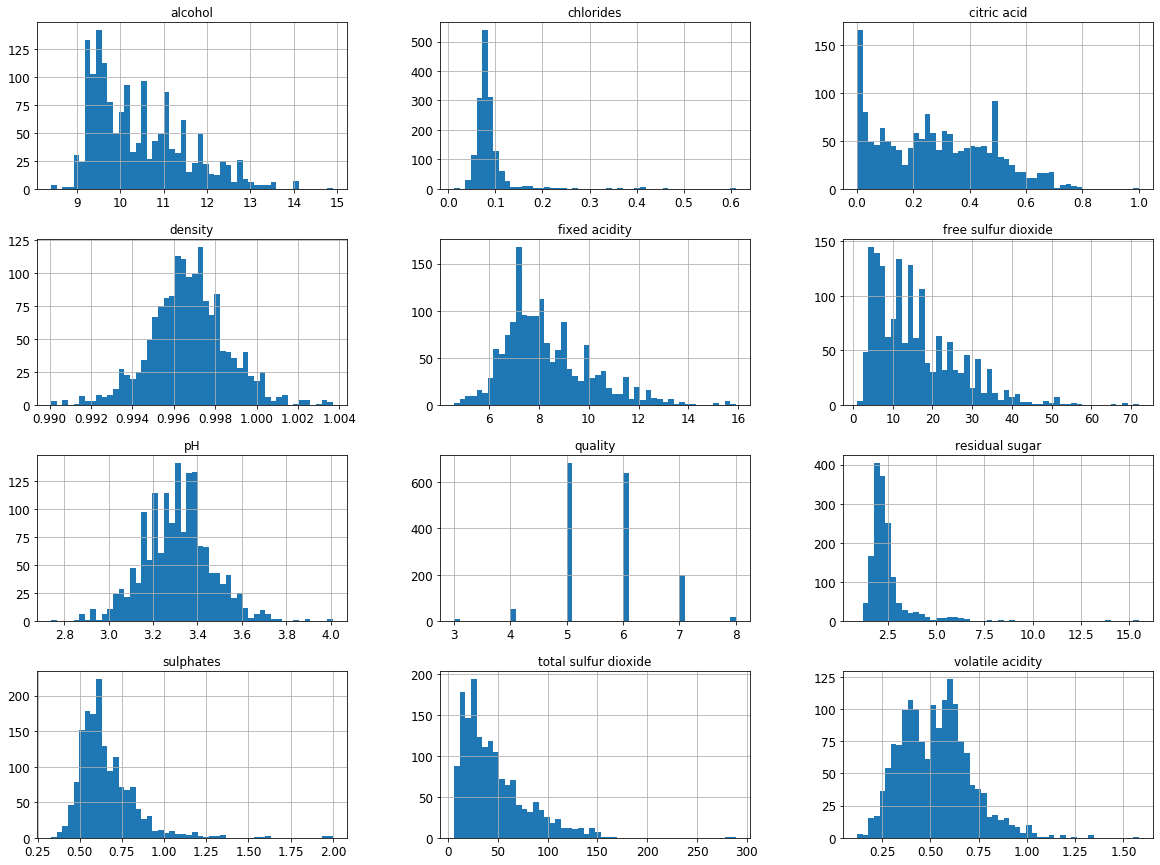

In [10]:
wine.hist(bins=50, figsize=(20,15))
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(wine,test_size=0.2, random_state=42)

test_set.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
803,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.9971,3.24,0.66,9.6,6
124,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.9960,3.39,0.48,9.5,5
350,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.0004,3.28,0.98,9.9,6
682,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.9980,3.33,0.54,9.8,5
1326,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.9948,3.39,0.60,10.6,6


In [13]:
test_set["citric acid"].value_counts()

0.00    27
0.49    13
0.24    13
0.08    11
0.02    11
        ..
0.14     1
0.61     1
0.48     1
0.60     1
0.16     1
Name: citric acid, Length: 70, dtype: int64

In [18]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 803 to 704
Data columns (total 12 columns):
fixed acidity           320 non-null float64
volatile acidity        320 non-null float64
citric acid             320 non-null float64
residual sugar          320 non-null float64
chlorides               320 non-null float64
free sulfur dioxide     320 non-null float64
total sulfur dioxide    320 non-null float64
density                 320 non-null float64
pH                      320 non-null float64
sulphates               320 non-null float64
alcohol                 320 non-null float64
quality                 320 non-null int64
dtypes: float64(11), int64(1)
memory usage: 32.5 KB


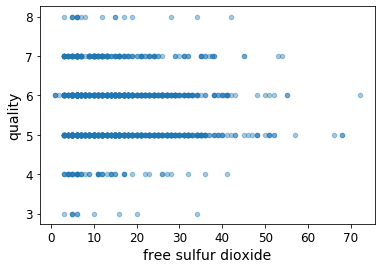

In [19]:
wine.plot(kind="scatter", x="free sulfur dioxide", y="quality", alpha=0.4)

In [20]:
dir(test_set)

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 

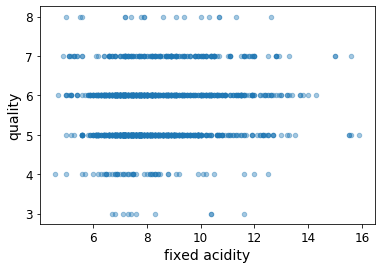

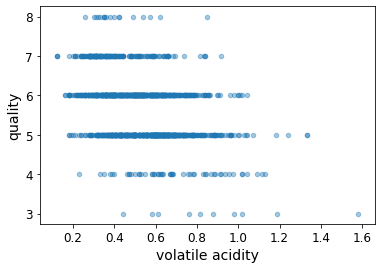

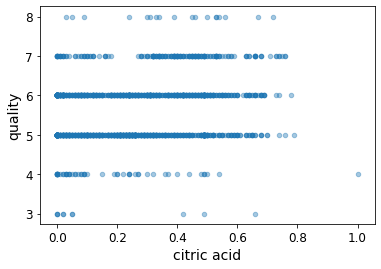

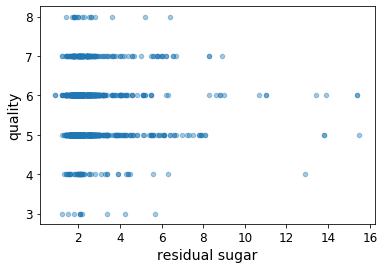

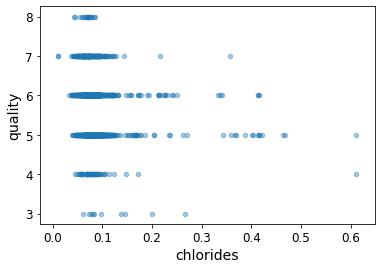

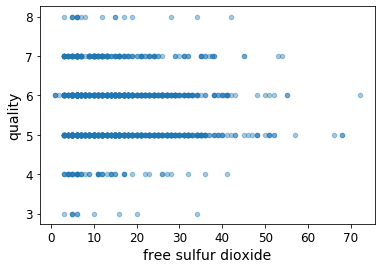

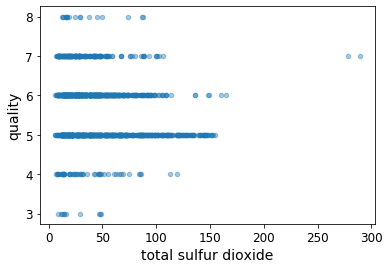

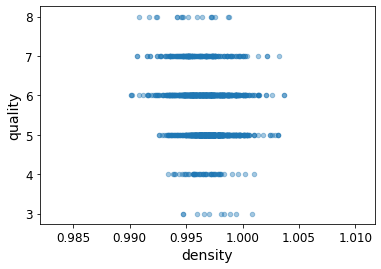

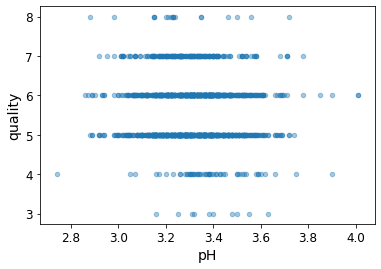

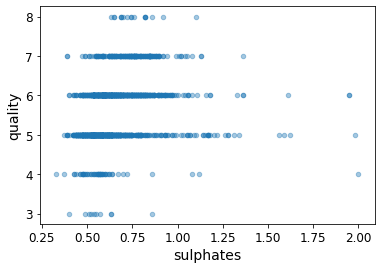

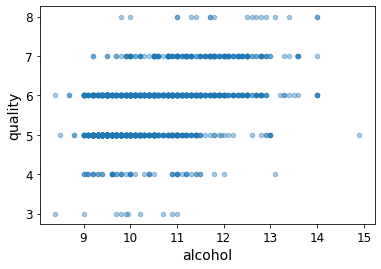

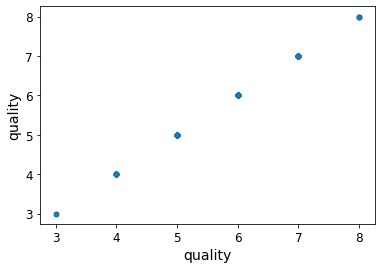

In [28]:
for i in (test_set.columns):
    wine.plot(kind="scatter",x=i, y="quality",alpha=0.4)

In [29]:
wine_train = train_set.drop("quality",axis=1)
wine_labels = train_set['quality'].copy()

In [30]:
wine_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
493,8.7,0.690,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9
342,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8
834,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4
705,8.4,1.035,0.15,6.0,0.073,11.0,54.0,0.99900,3.37,0.49,9.9


In [31]:
wine_labels.head()

493    6
354    6
342    6
834    5
705    5
Name: quality, dtype: int64

In [34]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(wine_train, wine_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [35]:
wine_test = test_set.drop("quality", axis=1)
wine_test_labels = test_set["quality"].copy()

In [36]:
wine_test_labels.head()

803     6
124     5
350     6
682     5
1326    6
Name: quality, dtype: int64

In [38]:
from sklearn.metrics import mean_squared_error

wine_predictions = forest_reg.predict(wine_test)
forest_mse = mean_squared_error(wine_test_labels, wine_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.5662099875487892

In [40]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(wine_train, wine_labels)
wine_predictions = svm_reg.predict(wine_test)
svm_mse = mean_squared_error(wine_test_labels, wine_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

0.6340413598690094

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon,reciprocal

param_distribs = {
    'kernel': ['linear', 'rbf'],
    'C': reciprocal(20,200000),
    'gamma': expon(scale=1.0)
}

svm_reg = SVR()

rnd_search = RandomizedSearchCV(svm_reg, param_distributions =param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, n_jobs=4, random_state=42)
rnd_search.fit(wine_train, wine_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


In [ ]:
rnd_search.best_params_

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
attributes = wine_train.columns
sorted(zip(feature_importances, attributes), reverse=True)